out/hist_m5.txt
|ticks|% accesses < ticks|
|-----|----------|
|100|96.9%|
|2,000|99.9%|
|10,000|100.0%|
|100,000|100.0%|
100.0% , 17634946
4290867 max time
out/hist_m5_shuff.txt
|ticks|% accesses < ticks|
|-----|----------|
|100|47.4%|
|2,000|63.1%|
|10,000|71.5%|
|100,000|83.8%|
100.0% , 15006525
12242362 max time


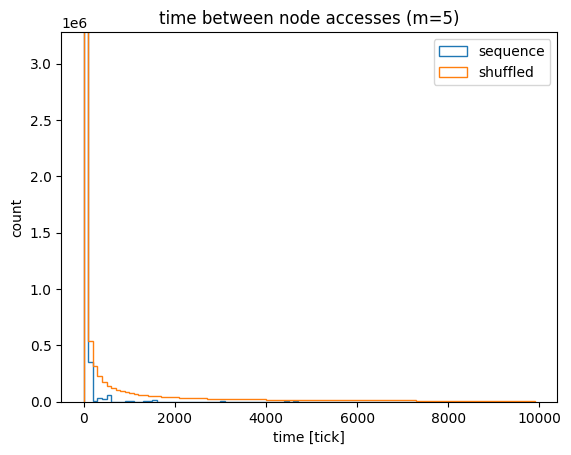

out/hist_m5.txt
|ticks|% accesses < ticks|
|-----|----------|
|100|96.9%|
|2,000|99.9%|
|10,000|100.0%|
|100,000|100.0%|
100.0% , 17634946
4290867 max time
out/hist_m5_shuff.txt
|ticks|% accesses < ticks|
|-----|----------|
|100|47.4%|
|2,000|63.1%|
|10,000|71.5%|
|100,000|83.8%|
100.0% , 15006525
12242362 max time


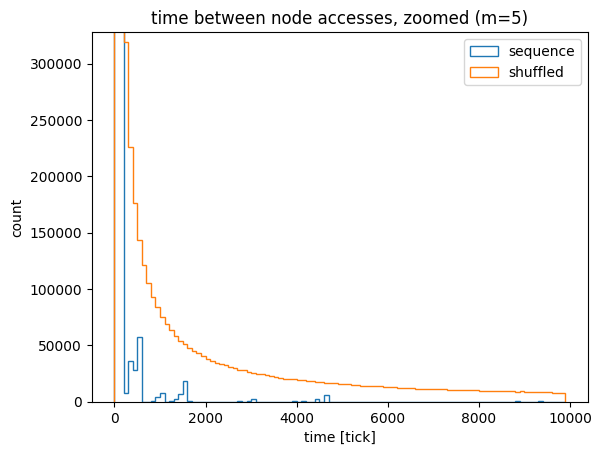

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_for_file(
    filename,
    title="",
    cutoff_ticks=0,
    prob=False,
    label=None,
    ylim_div = 1.0,
):
    print(f"{filename}")
    if title is None:
        plt.title(filename)
    elif title:
        plt.title(title)
    timers, counters = load_histogram_from_file(filename)
    print_stats(filename, timers=timers, counters=counters)
    
    if cutoff_ticks:
        ix = timers < cutoff_ticks
    else:
        ix = timers >= 0
    
    print(f"{np.sum(counters[ix])/np.sum(counters)*100:.1f}% , {np.sum(counters)}")
    print(f"{np.max(timers)} max time")
    plt.xlabel("time [tick]")
    # plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim((0, np.max(timers)/50))
    plt.ylim((0, np.max(counters)/ylim_div))
    #bins=None
    #bins = [0] + [1.3**e for e in range(10)]
    bins = [i*100 for i in range(100)]
    #bins = 100
    if prob:
        plt.ylabel("probability")
        plt.hist(timers[ix], weights=counters[ix], bins=bins, histtype='step', cumulative=True, density=True, label=label)
    else:
        plt.ylabel("count")
        plt.hist(timers[ix], weights=counters[ix], bins=bins, histtype='step', label=label)
        


def load_histogram_from_file(filename):
    dt_arr = [] 
    cnt_arr = []
    with open(filename) as h:
        it = iter(h)
        next(it)
        for line in it:
            dt, cnt = [int(p.strip()) for p in line.split()]
            dt_arr.append(dt)
            cnt_arr.append(cnt)
    timers = np.array(dt_arr)
    counters = np.array(cnt_arr)
    return timers, counters


def print_stats(filename, timers, counters):
    print(f"|ticks|% accesses < ticks|")
    print(f"|-----|----------|")
    for t in [100, 2_000, 10_000, 100_000]:
        ii = (timers < t)
        p = np.sum(counters[ii])/np.sum(counters)
        print(f"|{t:,}|{p*100:.1f}%|")



_ct=None
_prob=False
ylim_div=10
plot_histogram_for_file("out/hist_m5.txt", cutoff_ticks=_ct, prob=_prob, label="sequence")
plot_histogram_for_file("out/hist_m5_shuff.txt", cutoff_ticks=_ct, prob=_prob, label="shuffled")
plt.legend(loc="upper right")
plt.title("time between node accesses (m=5)")
#plt.show()
plt.savefig("img/hist_ticks_all.png")
plt.show()

#--


plot_histogram_for_file("out/hist_m5.txt", cutoff_ticks=_ct, prob=_prob, label="sequence", ylim_div=ylim_div)
plot_histogram_for_file("out/hist_m5_shuff.txt", cutoff_ticks=_ct, prob=_prob, label="shuffled", ylim_div=ylim_div)
plt.legend(loc="upper right")
plt.title("time between node accesses, zoomed (m=5)")
plt.savefig("img/hist_ticks_zoomed.png")
plt.show()

